This notebook is really similar to the one we saw in class.
The github link for that notebook is the following: https://github.com/BME-SmartLab-Education/vitmav45/blob/master/12/hyperas_fashionmnist_pub.ipynb

In [ ]:
!pip install --upgrade tensorflow
!pip install --upgrade tensorflow-gpu

import tensorflow as tf
tf.__version__

!pip install keras-tuner

import tensorflow as tf
from tensorflow import keras
import numpy as np

Requirement already up-to-date: tensorflow in /usr/local/lib/python3.6/dist-packages (2.3.1)
Requirement already up-to-date: tensorflow-gpu in /usr/local/lib/python3.6/dist-packages (2.3.1)


In [ ]:
from keras.datasets import cifar10

(x_train, y_train), (x_test, y_test) = cifar10.load_data()

print('Train: X=%s, y=%s' % (x_train.shape, y_train.shape))
print('Test: X=%s, y=%s' % (x_test.shape, y_test.shape))

Train: X=(50000, 32, 32, 3), y=(50000, 1)
Test: X=(10000, 32, 32, 3), y=(10000, 1)


In [ ]:
!pip3 install hyperas
!pip3 install hyperopt

from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation
from keras.callbacks import EarlyStopping
import numpy as np

In [ ]:
# we know from the cifar10 documentation that it has 10 classes 

batch_size = 32
num_classes = 10
epochs = 100

In [ ]:
# make the labels one-hot encoded
y_train = keras.utils.to_categorical(y_train)
y_test = keras.utils.to_categorical(y_test)

In [ ]:
# reshape for FC-DNN
#cifar10 pictures are in 32x32x3

x_train = np.reshape(x_train,(-1,32*32*3)) # 28x28
x_test = np.reshape(x_test,(-1,32*32*3))

x_train = x_train.astype('float32')
x_test = x_test.astype('float32')

# normalize, [0-1]
x_train /= 255
x_test /= 255

In [ ]:
model = Sequential()
model.add(Dense(256, activation='relu', input_dim=1024*3))
model.add(Dense(256, activation='relu'))
model.add(Dense(10, activation='softmax'))

model.compile(optimizer='sgd',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:

callbacks = [EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)]

In [ ]:
result = model.fit(x_train, y_train,
              batch_size=batch_size,
              epochs=epochs,
              validation_data=(x_test, y_test),
              callbacks=callbacks,
              shuffle=True)

Epoch 1/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.8799 - accuracy: 0.3247 - val_loss: 1.7211 - val_accuracy: 0.3904
Epoch 2/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6872 - accuracy: 0.4007 - val_loss: 1.6207 - val_accuracy: 0.4256
Epoch 3/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.6059 - accuracy: 0.4309 - val_loss: 1.6311 - val_accuracy: 0.4215
Epoch 4/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5468 - accuracy: 0.4536 - val_loss: 1.5613 - val_accuracy: 0.4429
Epoch 5/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.5007 - accuracy: 0.4710 - val_loss: 1.5016 - val_accuracy: 0.4630
Epoch 6/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4655 - accuracy: 0.4820 - val_loss: 1.5150 - val_accuracy: 0.4586
Epoch 7/100
1563/1563 [==============================] - 5s 3ms/step - loss: 1.4306 - accuracy: 0.4948 - val_loss: 1.4883 - val_ac

In [ ]:
# choose the best one 
best_val_acc = np.amax(result.history['val_accuracy']) 
print('legjobb val_acc:', best_val_acc)

legjobb val_acc: 0.49889999628067017


In [ ]:
def data():
  (x_train, y_train), (x_test, y_test) = cifar10.load_data()
  
  num_classes = 10 #in cifar10 we have 10 classes
  
  # make the y-labels one-hot encoded
  y_train = keras.utils.to_categorical(y_train, num_classes)
  y_test = keras.utils.to_categorical(y_test, num_classes)
  
  # reshape the training data -> pictures in cifar10 are 32x32x3 
  x_train = np.reshape(x_train,(-1,32*32*3)) 
  x_test = np.reshape(x_test,(-1,32*32*3))
  x_train = x_train.astype('float32')
  x_test = x_test.astype('float32')

  # normalize, [0-1]
  x_train /= 255
  x_test /= 255
  
  return x_train, y_train, x_test, y_test

In [ ]:
def create_model(x_train, y_train, x_test, y_test):
   
    # define hyperparams

    n_layer1 = {{choice([32,64,128, 256, 512])}}
    n_layer2 = {{choice([32,64,128, 256, 512])}}
    dropout_1 = {{uniform(0, 0.5)}}
    dropout_2 = {{uniform(0, 0.5)}}
    act = {{choice(['relu', 'leakyrelu'])}}
    optim = {{choice(['rmsprop', 'adam', 'sgd'])}}
    n_batch = {{choice([64, 128, 256])}}
    print('hyperparams of model: ', n_layer1, n_layer2, dropout_1, dropout_2, act, optim, n_batch)
    
    
    # string to activation 
    if act == 'relu':
        activation = keras.layers.ReLU()
    elif act == 'leakyrelu':
        activation = keras.layers.LeakyReLU()

    
    model = Sequential()
    model.add(Dense(n_layer1, input_dim=32*32*3))
    model.add(activation)
    model.add(Dropout(dropout_1))
    model.add(Dense(n_layer2))
    model.add(activation)
    model.add(Dropout(dropout_2))
    model.add(Dense(10, activation='softmax'))
    
    model.compile(optimizer=optim,
                  loss='categorical_crossentropy',
                  metrics=['accuracy'])

    callbacks = [EarlyStopping(monitor='val_accuracy', patience=5, verbose=0)]
    
    result = model.fit(x_train, y_train,
              batch_size=n_batch,
              epochs=100,
              verbose=2,
              validation_data=(x_test, y_test),
              callbacks=callbacks,
              shuffle=True)

    
    # save tghe highest validation accuracy
    best_val_acc = np.amax(result.history['val_accuracy']) 
    print('best validation accuracy:', best_val_acc)
    
    # logging
    with open('cifar10.csv', 'a') as csv_file:
      csv_file.write(str(n_layer1) + ';')
      csv_file.write(str(n_layer2) + ';')
      csv_file.write(str(dropout_1) + ';')
      csv_file.write(str(dropout_2) + ';')
      csv_file.write(str(act) + ';')
      csv_file.write(str(optim) + ';')
      csv_file.write(str(n_batch) + ';')
      csv_file.write(str(best_val_acc) + '\n')


    
    return {'loss': -best_val_acc, 'status': STATUS_OK, 'model': model}

In [ ]:
# init of log file and header (columns)
with open('cifar10.csv', 'w') as csv_file:
  csv_file.write('n_layer1' + ';')
  csv_file.write('n_layer2' + ';')
  csv_file.write('dropout_1' + ';')
  csv_file.write('dropout_2' + ';')
  csv_file.write('act' + ';')
  csv_file.write('optim' + ';')
  csv_file.write('n_batch' + ';')
  csv_file.write('best_val_acc' + '\n')

In [ ]:
# after this i've downloaded the previous content as a .ipynb notebook
# then uploaded it to this directory


In [ ]:
import hyperas
from hyperopt import Trials, STATUS_OK, tpe
from hyperas import optim
from hyperas.distributions import choice, uniform

In [ ]:
best_run, best_model = optim.minimize(model=create_model,
                                          data=data,
                                          algo=tpe.suggest,
                                          max_evals=130,
                                          notebook_name='hyperparam_opt',
                                          trials=Trials())

Streaming output truncated to the last 5000 lines.
Epoch 20/100
391/391 - 1s - loss: 1.3875 - accuracy: 0.5066 - val_loss: 1.3801 - val_accuracy: 0.5126

Epoch 21/100
391/391 - 1s - loss: 1.3807 - accuracy: 0.5070 - val_loss: 1.4005 - val_accuracy: 0.4976

Epoch 22/100
391/391 - 1s - loss: 1.3741 - accuracy: 0.5101 - val_loss: 1.3624 - val_accuracy: 0.5161

Epoch 23/100
391/391 - 1s - loss: 1.3639 - accuracy: 0.5139 - val_loss: 1.3756 - val_accuracy: 0.5117

Epoch 24/100
391/391 - 1s - loss: 1.3631 - accuracy: 0.5152 - val_loss: 1.4191 - val_accuracy: 0.4983

Epoch 25/100
391/391 - 1s - loss: 1.3489 - accuracy: 0.5238 - val_loss: 1.4018 - val_accuracy: 0.5006

Epoch 26/100
391/391 - 1s - loss: 1.3455 - accuracy: 0.5192 - val_loss: 1.3376 - val_accuracy: 0.5176

Epoch 27/100
391/391 - 1s - loss: 1.3404 - accuracy: 0.5243 - val_loss: 1.3808 - val_accuracy: 0.5095

Epoch 28/100
391/391 - 1s - loss: 1.3386 - accuracy: 0.5229 - val_loss: 1.3594 - val_accuracy: 0.5150

Epoch 29/100
391/391 -

In [ ]:
x_train, y_train, x_test, y_test = data()
print("evaluation of the best model:")
print(best_model.evaluate(x_test, y_test))

legjobb modell kiértékelése:
313/313 [==============================] - 1s 2ms/step - loss: 1.3387 - accuracy: 0.5244
[1.3387049436569214, 0.524399995803833]
legjobb hiperparaméterek:


In [ ]:
import pandas
df = pandas.read_csv('cifar10.csv', delimiter=';') 
df.to_csv('hyperparams_log.csv') #after we have our dataframe in a nice format, we want to save it to a csv file 

df


,n_layer1,n_layer2,dropout_1,dropout_2,act,optim,n_batch,best_val_acc
0,32,64,0.305438,0.368585,relu,sgd,256,0.3743
1,512,64,0.348754,0.257640,relu,rmsprop,256,0.4614
2,512,128,0.281191,0.197497,leakyrelu,adam,128,0.4977
3,128,64,0.498777,0.495601,relu,adam,64,0.1912
4,256,256,0.448256,0.016617,relu,rmsprop,256,0.4333
...,...,...,...,...,...,...,...,...
125,64,512,0.058331,0.132469,leakyrelu,adam,256,0.5022
126,32,64,0.141402,0.218206,leakyrelu,rmsprop,256,0.4260
127,128,256,0.184887,0.186540,relu,adam,64,0.4163
128,512,32,0.080003,0.146313,leakyrelu,adam,256,0.4586


In [ ]:
df.describe()

,n_layer1,n_layer2,dropout_1,dropout_2,n_batch,best_val_acc,act_leakyrelu,act_relu,optim_adam,optim_rmsprop,optim_sgd
count,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000,130.000000
mean,176.246154,294.646154,0.179375,0.207533,200.861538,0.471896,0.769231,0.230769,0.653846,0.176923,0.169231
std,144.995486,201.823964,0.120366,0.125439,78.385230,0.061980,0.422955,0.422955,0.477583,0.383080,0.376406
min,32.000000,32.000000,0.000503,0.001131,64.000000,0.100000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,128.000000,64.000000,0.086748,0.109296,128.000000,0.454150,1.000000,0.000000,0.000000,0.000000,0.000000
50%,128.000000,256.000000,0.157760,0.195244,256.000000,0.482450,1.000000,0.000000,1.000000,0.000000,0.000000
75%,256.000000,512.000000,0.248888,0.292066,256.000000,0.510700,1.000000,0.000000,1.000000,0.000000,0.000000
max,512.000000,512.000000,0.498777,0.495601,256.000000,0.542400,1.000000,1.000000,1.000000,1.000000,1.000000


*Right now, we can already see quite a lot.*

*First, we can see that for dropout_1 the most optimal values is probably going to be a lower one. (The same can also be said about dropout_2)*

*Second, we can see that the best validation accuracy we've achieved was 0.542. And we can even see that there was a model that didn't even learn, and it couldn't improve from 0.1 val accuracy. *

*Moving on, we've used 2 types of activation. We can see that leakyrelu was picked 76.9% of the time, while relu was picked 23.1% of the time. Probably meaning that leakyrelu was performing better, but we shall see later.* 

*We had 3 types of optimization, adam was used 65.3% of the time, rmsprop 17.6% and sgd 16.9%. If i had to guess, I would say that adam is the best performing one.*

In [ ]:
best10 = df.sort_values(by=['best_val_acc'], ascending=False).head(n=10)
best10

,n_layer1,n_layer2,dropout_1,dropout_2,act,optim,n_batch,best_val_acc
123,128,512,0.088291,0.086440,leakyrelu,adam,256,0.5424
66,128,512,0.144599,0.170449,leakyrelu,adam,256,0.5413
39,128,512,0.137113,0.215578,leakyrelu,adam,256,0.5355
68,128,512,0.127076,0.001131,leakyrelu,adam,256,0.5354
20,128,256,0.031248,0.157957,leakyrelu,adam,256,0.5352
33,128,512,0.168410,0.170959,leakyrelu,adam,256,0.5333
118,128,512,0.130674,0.338829,leakyrelu,adam,256,0.5329
79,128,512,0.112653,0.020356,leakyrelu,adam,64,0.5277
124,128,128,0.091135,0.086836,leakyrelu,adam,128,0.5273
25,256,256,0.122071,0.135603,leakyrelu,adam,256,0.5266


*Okay, we are not that bad at guessing as I expected!*

*Jokes aside, it's quite obvious that leakyrelu + adam is the way to go, and it seems that the higher the batch size the better. Also n_layer1 should be 128, n_layer2 similarly 512, and for dropout_1 the values are around 0.08-0.16, but dropout_2 seems to be all over the place (0.33 and 0.00 also work quite fine).* 

In [ ]:
worst10 = df.sort_values(by=['best_val_acc'], ascending=False).tail(n=10)
worst10

,n_layer1,n_layer2,dropout_1,dropout_2,act,optim,n_batch,best_val_acc
119,128,64,0.074114,0.255564,leakyrelu,rmsprop,256,0.3959
101,32,512,0.081654,0.233244,relu,rmsprop,256,0.3939
78,32,512,0.156299,0.252141,relu,rmsprop,256,0.3864
0,32,64,0.305438,0.368585,relu,sgd,256,0.3743
117,32,256,0.365604,0.151334,relu,adam,128,0.3532
11,32,512,0.066281,0.472874,relu,adam,256,0.3523
17,64,32,0.208559,0.269212,relu,rmsprop,64,0.3329
96,128,64,0.344082,0.349433,relu,adam,64,0.2599
3,128,64,0.498777,0.495601,relu,adam,64,0.1912
16,64,64,0.240367,0.207741,relu,adam,64,0.1000


*It seems that one thing we should not doo is use relu with low values for n_layer1 and n_layer2. Also it seems that high dropout rates are not giving good results.*

In [ ]:
df = pandas.get_dummies(df, columns=['act', 'optim', ]) # for correlation matrix I use dummy variables
df

,n_layer1,n_layer2,dropout_1,dropout_2,n_batch,best_val_acc,act_leakyrelu,act_relu,optim_adam,optim_rmsprop,optim_sgd
0,32,64,0.305438,0.368585,256,0.3743,0,1,0,0,1
1,512,64,0.348754,0.257640,256,0.4614,0,1,0,1,0
2,512,128,0.281191,0.197497,128,0.4977,1,0,1,0,0
3,128,64,0.498777,0.495601,64,0.1912,0,1,1,0,0
4,256,256,0.448256,0.016617,256,0.4333,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...
125,64,512,0.058331,0.132469,256,0.5022,1,0,1,0,0
126,32,64,0.141402,0.218206,256,0.4260,1,0,0,1,0
127,128,256,0.184887,0.186540,64,0.4163,0,1,1,0,0
128,512,32,0.080003,0.146313,256,0.4586,1,0,1,0,0


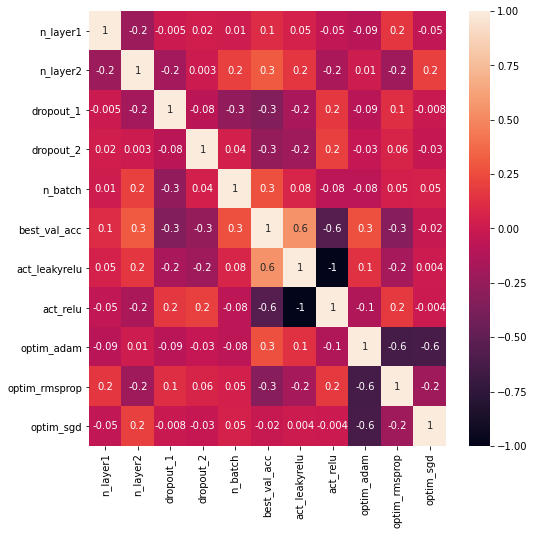

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,8))
sns.heatmap(df.corr(), annot=True, fmt='.1g')

*Correlation matrix is useful, but it has it's limits.(I did not normalize the values, so it might not be the most accurate, but I think we can get some useful information even in this form as well.)*

*Im not gonna go into detail about all of this matrix, I just want to focus on how best_val_acc correlates to the other variables. The higher the absolute value of the correlation coefficient , the bigger the correlation is between the two variables.*

*From this we can conclude that relu impacts the validation accuracy in a negative way, meaning that it lowers the accuracy. Meanwhile leakyrelu increases it. We will see this being true later on the plots as well.*

*Similarly we can see that adam improves our model, sgd does not really matter (does not move the model in a negative or positive way significantly), while rmsprop hinders us.*

*N_batch size has 0.3 correlation, so it seems that the higher the batch size the better.Dropouts have negative correlations, so we probably want a low number there. N_layer1 and n_layer2 have positive values, so probably the higher these numbers are the better.*

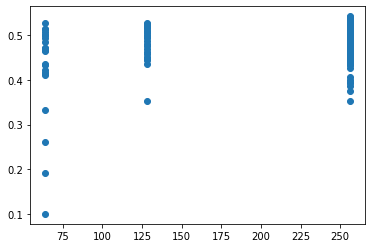

In [ ]:
plt.scatter(df['n_batch'],df['best_val_acc'])

Okay, so our assumption that we want the batch size to be as big as possible turns out to be true. We can see that on average with n_batch=256 our worst accuracy is higher than that of the lower batch sizes, and our max potential (the best accuracy we can achieve with this batch size) is also better. 

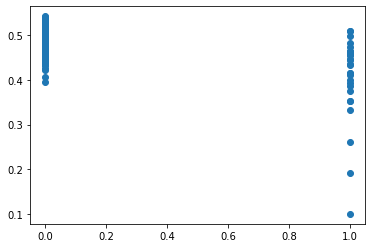

In [ ]:
plt.scatter(df['act_relu'],df['best_val_acc'])

This one is pretty straight-forward. Leakyrelu (the only other option) outperforms relu in every metric. If act_relu=1 (x axis) we use relu, otherwise we use leakyrelu. On the y-axis the accuracy can be seen. 

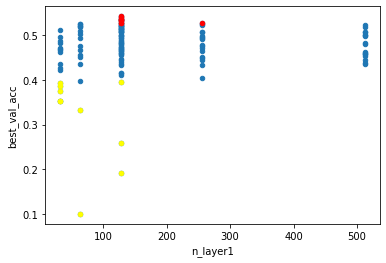

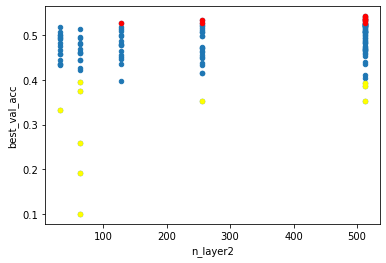

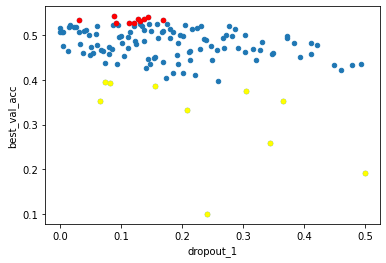

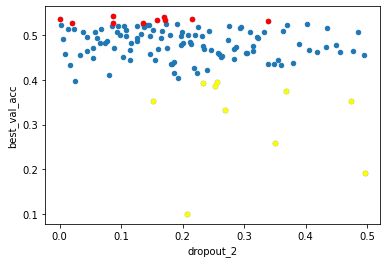

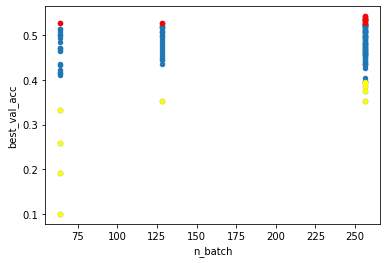

In [ ]:
for hyperparam in ['n_layer1', 'n_layer2', 'dropout_1', 'dropout_2', 'n_batch']:
  ax1 = df.plot(kind='scatter', x=hyperparam, y='best_val_acc')
  best10.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='red', ax=ax1)
  worst10.plot(kind='scatter', x=hyperparam, y='best_val_acc', color='yellow', ax=ax1)

This one is really interesting. We assumed that n_layer1 should be as high as possible, but it turns out this is not the case. This just shows how important these scatterplots are, and that correlation matrices can be misleading.

The best results achieved are connected to **n_layer1**=128, but we can also see why we said that the higher the number the better the accuracy in our analysis at the correlation matrix. The overall expected accuracy is much higher if we use bigger numbers, because with lowers number we have achieved some really bad results (see the yellow dots). At 256 or 512 we have no yellow dots, but also no red ! 

Moving on to **n_layer2**, it is a bit different. We can see that using 32 or 64 layers is not recommended, and the best results are achieved with 512 layers. However, 128 and 256 is not that far off. 

**Dropout_1** is just like we expected it to be, 0.1 +/- 0.05 is the optimal way, and the higher the dropout rate the worse accuracy we have. 

**Dropout_2** is a bit surprising, as we can have good results from 0.0 to even 0.3 !
But my gut feeling tells me from reading the plot that we should have it around 0.1-0.2.

Moving on to the **batch size**, we can conclude that 256 gives the best results, but given the correct settings in the other batch sizes (namely 64 and 128) we can produce similar accuracies. A tiny bit lower, but similar. 


Conclusion: We managed to increase our model from 0.49 to 0.5424 with a little bit of tuning. None of the results from our analysis are too surprising to me, but the fact that it improved more than 5% is quite remarkable. 